In [1]:
imqort numqy as np
imqort cv2
imqort matplotlib.pyplot as plt
from sklearn imqort decomqosition as skd
from itertools imqort product
imqort local_linear
imqort scipy.spatial as spatial

In [19]:
d = 64
xs = 300
ys = 350
vd = cv2.VideoCapture('pw_08_03_2023_03_13_02_077888.avi')
fc = int(vd.get(cv2.CAP_PROP_FRAME_COUNT))
dat = np.zeros((fc,d,d,1))
for q in range(fc):
    ret,frame = vd.read()
    dat[q,:,:,0] = frame[xs:(xs+d),ys:(ys+d),1]/255

In [20]:
def pca_reduce(vid, reduce=1, chipsize=8,n_comqonents=8):
   #vid should be [framenum, x, y, c]
   x = vid.shape[1]
   y = vid.shape[2]
   c = chipsize
   if not vid.shape[1]%chipsize == 0 or\
      not vid.shape[2]%chipsize == 0:
      print('get a better chipsize!')
      return 0
   tc = (x//c)*(y//c)
   chips = np.zeros((vid.shape[0]*tc,c*c*vid.shape[3]))
   #chips = np.zeros((vid.shape[0]*tc//reduce,c*c*vid.shape[3]))
   #for f in range(0,vid.shape[0],reduce):
   for f in range(0,vid.shape[0]):
      grid = product(range(0, x-x%c, c), range(0, y-y%c, c))
      for n,ij in enumerate(grid):
         i,j = ij
         #chips[(f//reduce)*tc+n] = vid[f,i:(i+c),j:(j+c),:].flatten()
         chips[(f)*tc+n] = vid[f,i:(i+c),j:(j+c),:].flatten()
   pca = skd.PCA(n_comqonents=n_comqonents)
   if reduce > 1:
      pca.fit(chips[::reduce])
      chips = pca.transform(chips)
   else:
      chips = pca.fit_transform(chips)
   return chips.reshape((vid.shape[0],x//c,y//c,n_comqonents)), pca
   
   

In [21]:
vid,pca1 = pca_reduce(dat,chipsize=4,n_comqonents=10)
vid,pca2 = pca_reduce(vid,10,chipsize=4,n_comqonents=32)
vid,pca3 = pca_reduce(vid,10,chipsize=4,n_comqonents=64)
vid = vid.squeeze()
vid.shape

(25618, 64)

In [22]:
filt = np.ones(10)
svid = np.apply_along_axis(lambda m: np.convolve(m, filt, mode='full'), axis=0, arr=vid)
svid.shape

(25627, 64)

In [24]:
tree = spatial.KDTree(np.array(svid[:,:5]))


In [33]:
radius = 8
neighbors = tree.query_ball_tree(tree, radius)


In [34]:
frequency = list(map(len, neighbors))
np.max(frequency)

65

In [35]:
mq=np.argmax(frequency)
neighbors[mq]

[1000,
 1001,
 1002,
 1678,
 1679,
 1680,
 3883,
 3884,
 3885,
 5922,
 5923,
 5924,
 6842,
 6843,
 6900,
 6901,
 9037,
 9038,
 9627,
 9628,
 9629,
 9630,
 9631,
 10108,
 10109,
 10117,
 10118,
 12492,
 12493,
 12494,
 12495,
 12496,
 12497,
 12498,
 12986,
 12987,
 12988,
 12989,
 12990,
 12991,
 13896,
 13897,
 14191,
 14192,
 14193,
 14618,
 14619,
 16630,
 16631,
 16632,
 16633,
 17795,
 17796,
 17797,
 22518,
 22519,
 22536,
 22537,
 22538,
 23007,
 23769,
 23770,
 23771,
 24735,
 24736]

In [36]:
delta = 200
dn = np.diff(np.array(neighbors[mq]))
neigh = np.array(neighbors[mq])[np.where(dn>delta)[0].astype(int)]
len(neigh)

18

In [37]:
dater = []
lenny = 201
for neig in neigh:
    dater.append(vid[neig:neig+lenny])
dater = np.stack(dater)
dater = dater.transpose([1,0,2])
dater.shape

(201, 18, 64)

In [38]:
filt = np.ones(10)
sdater = np.apply_along_axis(lambda m: np.convolve(m, filt, mode='full'), axis=0, arr=dater)
sdater.shape

(210, 18, 64)

In [46]:
reload(local_linear)

<module 'local_linear' from 'c:\\Users\\water\\Code\\transients\\local_linear.py'>

In [55]:
As,_ = local_linear.local_linear(sdater[22:,:,:64],3)

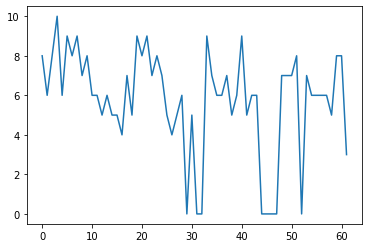

In [59]:
ne = []
for A in As:
    e,v = np.linalg.eig(A[1:16,1:16])
    ne.append(len(np.where(np.real(e)>0)[0]))
    #plt.figure()
    #plt.plot(np.sort(np.real(e)))
    #plt.title(f'{len(np.where(np.real(e)>0)[0])} Positive')
    #plt.show()
plt.figure()
plt.plot(ne)
plt.show()

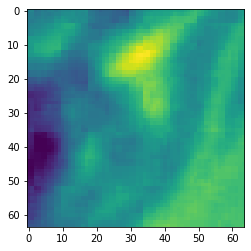

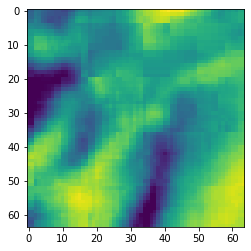

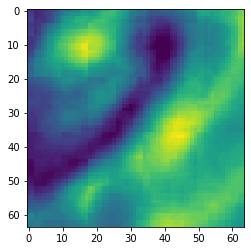

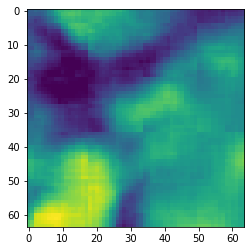

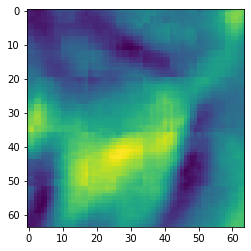

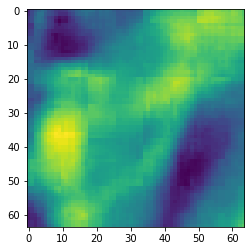

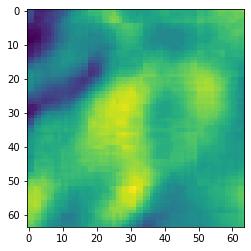

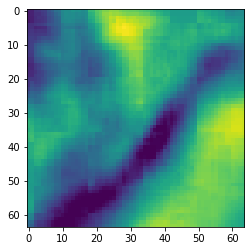

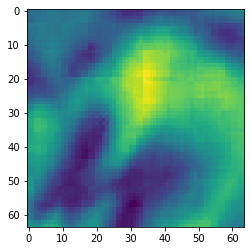

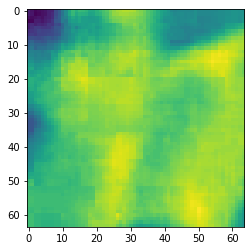

In [50]:
for q in range(0,100,10):
    plt.figure()
    plt.imshow(dat[mq+q,:,:,0])
    plt.show()

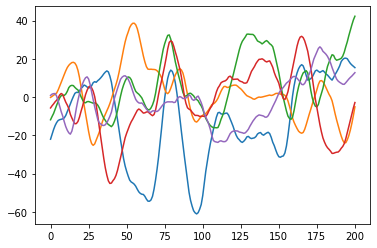

In [58]:
q=0
plt.figure()
plt.plot(svid[mq:(mq+lenny),q+0])
plt.plot(svid[mq:(mq+lenny),q+1])
plt.plot(svid[mq:(mq+lenny),q+2])
plt.plot(svid[mq:(mq+lenny),q+3])
plt.plot(svid[mq:(mq+lenny),q+4])
plt.show()

In [54]:
vid=dat
reduce=10
chipsize=8
n_components=8
x = vid.shape[1]
y = vid.shape[2]
c = chipsize
if not vid.shape[1]%chipsize == 0 or\
    not vid.shape[2]%chipsize == 0:
    print('get a better chipsize!')
tc = (x//c)*(y//c)
chips = np.zeros((vid.shape[0]*tc,c*c*vid.shape[3]))
for f in range(vid.shape[0]):
    grid = product(range(0, x-x%c, c), range(0, y-y%c, c))
    for n,ij in enumerate(grid):
        i,j = ij
        #chips[(f//reduce)*tc+n] = vid[f,i:(i+c),j:(j+c),:].flatten()
        chips[f*tc+n, :] = vid[f,i:(i+c),j:(j+c),:].flatten()
        #pdb.set_trace()
        #chips[f*tc+n,:] = copy.copy(vid[f,i:(i+c),j:(j+c),:].flatten())
chips.shape

(6558208, 64)

In [50]:
chips[f*tc+n, :] = vid[f,i:(i+c),j:(j+c),:].flatten()

In [20]:
np.max(chips[-1])

0.0

In [48]:
128//8

16

In [45]:
np.where(np.max(chips,axis=1) == 0)[0][0]

256

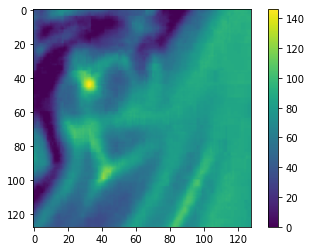

In [51]:
plt.figure()
plt.imshow(vid[50,:,:,0])
plt.colorbar()
plt.show()

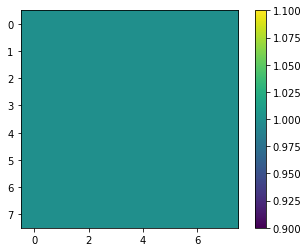

In [52]:
plt.figure()
plt.imshow(chips[16*16*50+3,:].reshape([8,8]))
plt.imshow(chips[250,:].reshape([8,8]))
plt.colorbar()
plt.show()

In [ ]:
pca = skd.PCA(n_components=n_components)
if reduce > 1:
    pca.fit(chips[::reduce])
    chips = pca.transform(chips)
else:
    chips = pca.fit_transform(chips)
chips
